In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [106]:
df=pd.read_csv('Churn_Modelling.csv')
# Data Exploration
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [107]:
df.shape

(10000, 14)

In [108]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [109]:
# Above values tells that data is imbalanced

In [110]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [111]:
df.drop(['CustomerId','Surname','RowNumber'],axis=1,inplace=True)

In [112]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [113]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


# Data Visualization

In [114]:
# plotting tenure 
tenure_chur_no=df[df.Exited==0].Tenure
tenure_chur_yes=df[df.Exited==1].Tenure

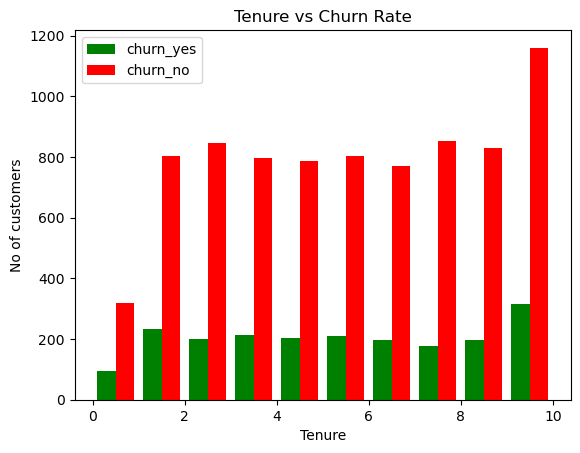

In [115]:
plt.hist([tenure_chur_yes,tenure_chur_no],color=['green','red'],label=['churn_yes','churn_no'])
plt.xlabel('Tenure')
plt.ylabel('No of customers')
plt.title('Tenure vs Churn Rate')
plt.legend()

In [116]:
#Observation: from the above plot it is not making any impact only give average of 200 to 250 customers leaving the bank

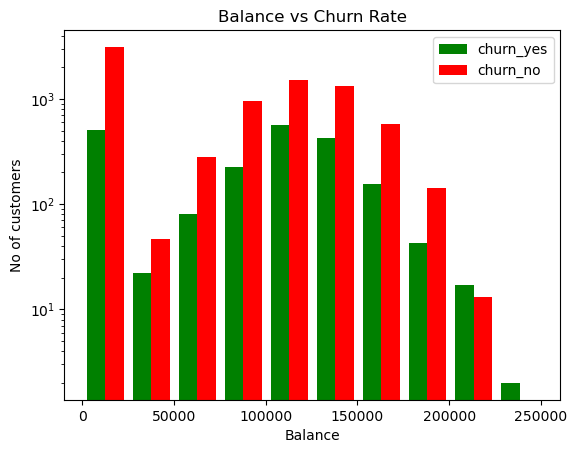

In [117]:
tenure_chur_no=df[df.Exited==0].Balance
tenure_chur_yes=df[df.Exited==1].Balance
plt.hist([tenure_chur_yes,tenure_chur_no],color=['green','red'],label=['churn_yes','churn_no'])
plt.xlabel('Balance')
plt.ylabel('No of customers')
plt.title('Balance vs Churn Rate')
plt.yscale('log')
plt.legend()

In [118]:
# Observation Customers having balance more than 200000 are tend to leave the bank

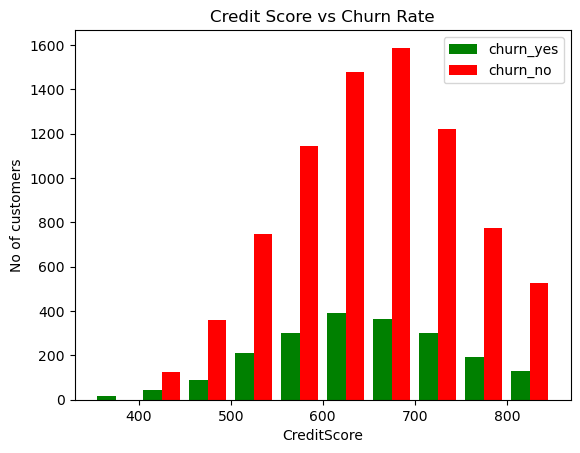

In [119]:
tenure_chur_no=df[df.Exited==0].CreditScore
tenure_chur_yes=df[df.Exited==1].CreditScore
plt.hist([tenure_chur_yes,tenure_chur_no],color=['green','red'],label=['churn_yes','churn_no'])
plt.xlabel('CreditScore')
plt.ylabel('No of customers')
plt.title('Credit Score vs Churn Rate')
plt.legend()

In [120]:
#Observation:Although dataset is imbalanced still we can observe that customer who are having credit score less than 700 has more chance of leaving the bank and chance of leaving the bank reduces gradually.
#Also people who are staying in the bank and having high credit score are in less population in wole compared to other categories of credit scores, we can derive to more conculsions that they maynot like the outcomes of the bank or have found a better bank to have an account with more benifits.

# Feature Scaling and Engineering

In [121]:
df['Gender'] = df.Gender.replace({'Female':0,'Male':1})

In [122]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [123]:
df2 = pd.get_dummies(df,columns=['Geography'],drop_first=True,dtype='int')

In [124]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [125]:
df2.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      int32
Geography_Spain        int32
dtype: object

In [126]:
# using minmaxscaler to scale 
from sklearn.preprocessing import MinMaxScaler
columns = ['CreditScore','Balance','EstimatedSalary','Age']
scale=MinMaxScaler()
for cols in columns:
    df2[cols]=scale.fit_transform(df2[[cols]])

In [127]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,2,0.000000,1,1,1,0.506735,1,0,0
1,0.516,0,0.310811,1,0.334031,1,0,1,0.562709,0,0,1
2,0.304,0,0.324324,8,0.636357,3,1,0,0.569654,1,0,0
3,0.698,0,0.283784,1,0.000000,2,0,0,0.469120,0,0,0
4,1.000,0,0.337838,2,0.500246,1,1,1,0.395400,0,0,1



# Model Building

In [128]:
X=df2.drop('Exited',axis=1)
y=df2['Exited']

In [135]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=keras.Sequential([
    keras.layers.Dense(11,input_shape=(11,),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

model.fit(X_train,y_train,epochs=50)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7899 - loss: 0.5396
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7936 - loss: 0.4977
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7910 - loss: 0.4781
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7930 - loss: 0.4709
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7991 - loss: 0.4548
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8049 - loss: 0.4528
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8185 - loss: 0.4267
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8027 - loss: 0.4556
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8094 - loss: 0.4338
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8129 - loss: 0.4272
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8025 - loss: 0.4386
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [136]:
model.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8523 - loss: 0.3500


[0.34956836700439453, 0.8539999723434448]

In [144]:
y_pred=model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [145]:
y_pred[5:10]

array([[0.01145023],
       [0.13171552],
       [0.13084094],
       [0.27908328],
       [0.49548692]], dtype=float32)

In [146]:
y_test[5:10]

6340    0
576     0
5202    1
6363    0
439     0
Name: Exited, dtype: int64

In [150]:
yp=[]

for i in y_pred:
    if i>0.5:
        yp.append(1)
    else:
        yp.append(0)
yp[100:110]

[1, 1, 0, 0, 0, 0, 0, 0, 0, 1]

In [151]:
y_test[100:110]

764     1
5019    1
4903    0
8093    0
6843    0
2165    0
1862    1
7850    0
9123    0
2340    1
Name: Exited, dtype: int64

In [152]:
from sklearn.metrics import classification_report,confusion_matrix

In [156]:
cf=confusion_matrix(yp,y_test)
cf

array([[1556,  241],
       [  51,  152]], dtype=int64)

<Axes: >

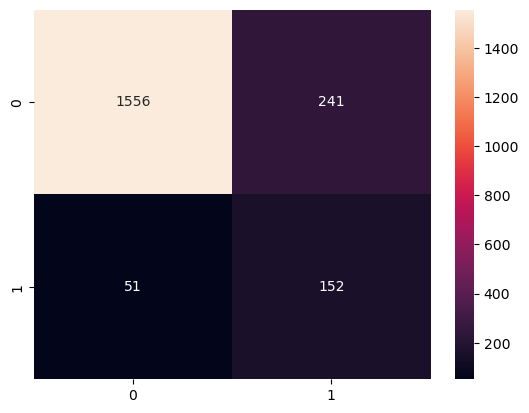

In [158]:
import seaborn as sns
sns.heatmap(cf,annot=True,fmt='d')

In [161]:
print(classification_report(yp,y_test))

              precision    recall  f1-score   support

           0       0.97      0.87      0.91      1797
           1       0.39      0.75      0.51       203

    accuracy                           0.85      2000
   macro avg       0.68      0.81      0.71      2000
weighted avg       0.91      0.85      0.87      2000

